# Lasso: alpha参数和准确率

参考资料：
- [Lasso model selection: Cross-Validation / AIC / BIC](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)

之前我们学习的Lasso，目标函数是：
$$\min_{w} \frac{1}{2n_{samples}} \|y - Xw\|^2_2 + \alpha \|w\|_1$$

其中$\alpha$是$L_1$惩罚项的重要性：$\alpha$很小的时候，优化问题接近普通的线性回归；$\alpha$很大，误差就会上升。因此我们需要为我们的优化问题找到一个合适$\alpha$，而这可以通过交叉验证来实现。

我们先来看看对于已经分好的训练集和测试集，误差会如何随着$\alpha$变化。 sklearn来从事机器学习的任务 。 slkearn 做机器学习和数据挖掘的python 的集成系统， 几乎所有的机器学习方法， 都可以直接调用sklearn的包来运行。sklearn可以让大家学习机器学习，可以直接调用sklearn的数据来进行机器学习。 train test split= 把数据分解乘训练集和测试集合，为了进行交叉验证， 选择超参数 和正则化的变量， 评估结构风险。 我们要选择test size，控制测试和训练集的比例，我们要选择 random seed， 来控制 我的随机种子 ， 在其他情况，让random seed 去不同的数字。  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import RidgeCV, Ridge
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# rng = np.random.RandomState(42)
# X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

SEED = 30 # for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=SEED)

In [3]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [5]:
diabetes = datasets.load_diabetes()
indices = (0, 1)

X_train = diabetes.data[:-20, indices]
X_test = diabetes.data[-20:, indices]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

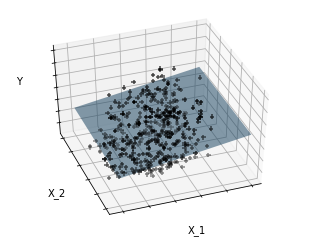

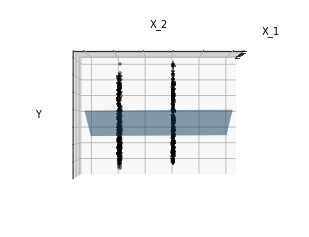

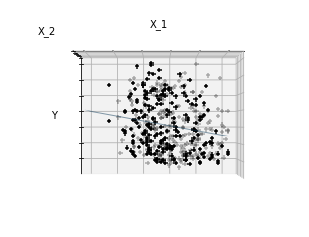

In [6]:
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    fake_data = np.zeros((4, X_train.shape[1]))
    fake_data[:, :2] = np.array([[-.1, -.1, .15, .15], [-.1, .15, -.1, .15]]).T
    
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(fake_data).reshape((2, 2)),  alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
#Generate the three different figures from different views

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)
plt.show()

In [46]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# rng = np.random.RandomState(42)
# X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

SEED = 30 # for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

In [8]:
np.linspace(0,10,10, endpoint = True)

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])

In [47]:
m_log_alphas = - np.linspace(np.log(1e-3), np.log(2))
alphas = np.exp(- m_log_alphas)

[  14.61335741 -261.85465347  512.83813409  332.22889555 -687.97552918
  378.77285657   34.33724922  125.02540475  735.37425276   63.27614301]
[  13.99987953 -259.19636605  514.24530612  330.94251607 -601.8806477
  309.21828327   -0.          116.98472226  702.83139644   63.01916808]
[  12.66836696 -253.4494174   517.24968785  328.13744629 -414.24267835
  157.92840214  -75.27232911   98.91282631  632.00798419   62.47609726]
[   8.42253797 -242.78902284  518.92063055  322.68607211 -197.49061834
    0.         -173.72933111   54.64210352  554.90529724   61.1375388 ]
[   0.         -222.81857727  516.00803583  312.67541313 -143.36759588
   -0.         -209.74568941    0.          543.83563476   56.20865792]
[   0.         -185.39786552  512.15201977  292.48125292  -97.59634873
   -0.         -198.56226376    0.          516.41711968   38.75883771]
[  0.00000000e+00  -1.03974186e+02   5.04022231e+02   2.48609347e+02
  -0.00000000e+00  -2.21537524e-01  -1.73610016e+02   0.00000000e+00
   4.

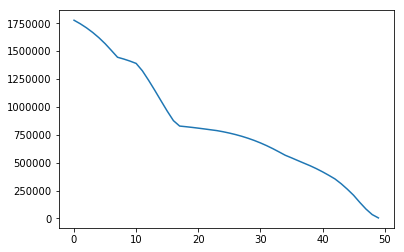

In [48]:
train_mses = []
test_mses = []
k=0
weights=[]
#对每个alpha做一个LASSO
for alpha in alphas:
    k+=1
    model = Lasso(alpha=alpha)
    model.fit(X_train,y_train)
    train_mses.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, model.predict(X_test)))
    if (k%5 == 0):
        print (model.coef_)
    weights.append(sum((model.coef_)**2))
plt.plot(weights)

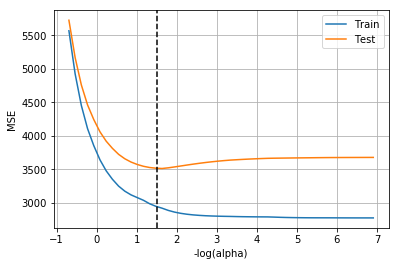

In [31]:
plt.plot(m_log_alphas, train_mses)
plt.plot(m_log_alphas, test_mses)
plt.grid()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])

plt.axvline(-np.log(0.22), linestyle='--', color='k')

我们看到，训练集和测试集的MSE都是随$\alpha$增大而上升的。另一方面，当$\alpha$取到到合适的值(上图中是$\alpha \approx 0.22$)，测试集的误差会比普通的线性回归好，而我们选择$\alpha$的目的就是让测试集的MSE尽可能小。

但是仅仅通过这一个训练集/测试集分割来选择$\alpha$随机性还比较大。通常的做法是用交叉验证做若干次训练集/测试集分割，对每个分割都画出上面的测试集MSE随$\alpha$变化的曲线，然后选择一个在每一个测试集上误差都比较小的$\alpha$。如下：



# We choose hyper parameter by cv grid search:  Here is the cross validation results : we use 5 fold cv and also test the performance . 综合来看， 我们发现在参数alpha比较小的时候， 模型的参数多，训练集的表现很好， 但是在测试集合的平均反而较差，体现了过拟合的概念。 这一现象背后的本质是， 参数多的时候， 需要的训练数据就更多，一旦我们没有那么多数据， 从而在模型空间里得到最佳参数， 模型空间大而数据小， 使得我们选择出正确模型的几率更低. 这里衡量模型的误差用了R2，它是用1减去均方误差和模型方差基础上得到的。某种角度可以理解为ratio of explained variance

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso

X = diabetes.data
y = diabetes.target

m_log_alphas = - np.linspace(np.log(1e-3), np.log(2))
alphas = np.exp(- m_log_alphas)

tuned_parameters = [ {'alpha': alphas}]

score ='r2'



clf = GridSearchCV(Lasso(alpha=0.1), tuned_parameters, cv=10,scoring='%s' % score)


clf.fit(X, y)
print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

{'alpha': 0.056437391986112632}
0.462 (+/-0.293) for {'alpha': 0.0010000000000000002}
0.462 (+/-0.292) for {'alpha': 0.0011677986237376523}
0.462 (+/-0.292) for {'alpha': 0.0013637536256035543}
0.462 (+/-0.292) for {'alpha': 0.0015925896070970653}
0.462 (+/-0.291) for {'alpha': 0.0018598239513468405}
0.462 (+/-0.291) for {'alpha': 0.002171899850777162}
0.462 (+/-0.290) for {'alpha': 0.0025363416566335814}
0.462 (+/-0.290) for {'alpha': 0.002961936295945173}
0.462 (+/-0.289) for {'alpha': 0.0034589451300033745}
0.462 (+/-0.288) for {'alpha': 0.0040393513624019939}
0.463 (+/-0.287) for {'alpha': 0.004717148961805858}
0.462 (+/-0.286) for {'alpha': 0.0055086800655623795}
0.462 (+/-0.286) for {'alpha': 0.0064330289991747797}
0.462 (+/-0.285) for {'alpha': 0.0075124824117007187}
0.461 (+/-0.284) for {'alpha': 0.0087730666212374152}
0.462 (+/-0.283) for {'alpha': 0.010245175126239786}
0.462 (+/-0.282) for {'alpha': 0.011964301412374057}
0.462 (+/-0.281) for {'alpha': 0.013971894723352857}
0.

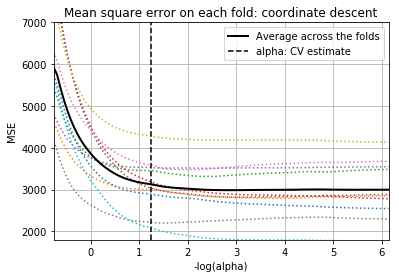

In [74]:
model = LassoCV(cv=10).fit(X, y)

m_log_alphas = -np.log(model.alphas_)

plt.figure()
ymin, ymax = 1800, 7000
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.xlim(m_log_alphas[0], m_log_alphas[-1])
plt.grid()
#print('交叉验证选择的alpha:', model.alpha_)

In [9]:
print (np.shape(model.mse_path_),np.shape(m_log_alphas))

(100, 10) (100,)


# Try Ridge : 这是第二种正则化的方法， 相比lasso，由于不具备稀疏效果， 得到的结果不比上一个 用二范数距离进行过你和控制

In [10]:
m_log_alphas = - np.linspace(np.log(1e-4), np.log(2))
alphas = np.exp(- m_log_alphas)
train_mses = []
test_mses = []
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train,y_train)
    train_mses.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, model.predict(X_test)))

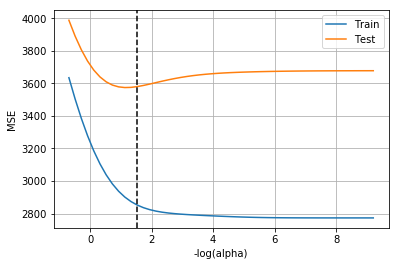

In [11]:
# way to choose alpha 
plt.plot(m_log_alphas, train_mses)
plt.plot(m_log_alphas, test_mses)
plt.grid()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])

plt.axvline(-np.log(0.22), linestyle='--', color='k')

交叉验证选择的alpha: 0.00380163311925


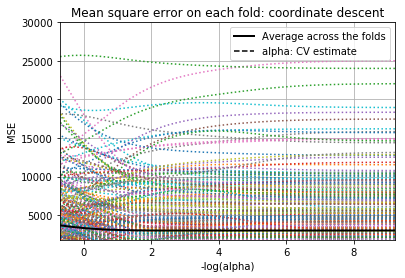

In [116]:
model = RidgeCV(alphas=alphas,store_cv_values=True).fit(X, y)

m_log_alphas = -np.log(model.alphas)

plt.figure()
ymin, ymax = 1800, 30000

plt.plot(m_log_alphas,np.array(model.cv_values_).transpose(), ':')
plt.plot(m_log_alphas, model.cv_values_.mean(axis=0), 'k',
         label='Average across the folds', linewidth=2)

plt.axvline(np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.xlim(m_log_alphas[-1],m_log_alphas[0])
plt.grid()
print('交叉验证选择的alpha:', model.alpha_)

In [106]:
RidgeCV?